In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('BTC-USD (1).csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2683 non-null   object 
 1   Open       2683 non-null   float64
 2   High       2683 non-null   float64
 3   Low        2683 non-null   float64
 4   Close      2683 non-null   float64
 5   Adj Close  2683 non-null   float64
 6   Volume     2683 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 146.9+ KB


Определим обьем базы данных по количеству столбцов и строк и типы данных расположенных в ней.

In [5]:
df[:2800].head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [6]:
d= df['Close'] - df['Adj Close']
d.sum()

0.0

Определим столбец который не играет роли, в данном случае это Adj Close, так как он полностью совпадает с столбцом Close. Это связано с тем что биткоин децетралализованая валюта и ее никто не корректирует. Поэтому удаляем этот столбец.

In [7]:
df = df.drop(columns ='Adj Close')
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,2683.000000,2683.000000,2683.000000,2683.000000,2.683000e+03
mean,10989.900302,11286.625175,10662.957284,11003.581793,1.459304e+10
std,15902.616531,16331.949304,15408.069197,15908.160803,2.008458e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,601.778015,606.707001,596.048005,602.733490,7.839140e+07
50%,6235.029785,6371.549805,6093.669922,6238.049805,4.999240e+09
75%,10316.638183,10495.605957,10067.539062,10317.936035,2.445092e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


Рассмотрим разницу между ценой открытия и ценой закрытия в течение дня и разницу между максимальной и минимальной ценой. Для этого добавим 2 новых столбца и рассмотрим их.

In [9]:
df1 = df.copy()
df1['dif_open_close']= df['Close'] - df['Open']
df1['dif_high_low'] = df['High'] - df['Low']

In [10]:
df17 = df1.query("'2017-01-01' <= Date < '2022-01-01'")
df17['dif_high_low'].describe() .apply("{0:.2f}".format)

count     1826.00
mean       893.42
std       1305.29
min          3.57
25%        153.76
50%        337.11
75%       1065.64
max      12864.62
Name: dif_high_low, dtype: object

In [11]:
df1.groupby(df1['dif_high_low']).min()

,Date,Open,High,Low,Close,Volume,dif_open_close
dif_high_low,,,,,,,
1.028000,2015-10-04,238.531006,238.968002,237.940002,238.259003,12999000,-0.272003
1.172012,2015-05-28,237.257004,237.824005,236.651993,237.408005,13829600,0.151001
1.339996,2015-06-06,225.005005,225.718994,224.378998,225.619003,11131500,0.613998
1.359009,2015-09-17,229.076004,230.285004,228.925995,229.809998,18935400,0.733994
1.455001,2015-09-20,231.399002,232.365005,230.910004,231.212006,14444700,-0.186996
...,...,...,...,...,...,...,...
8788.828125,2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,75215403907,-7563.996094
8914.339844,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,106102492824,-5380.503907
9568.558594,2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,65210059683,-5849.351563


Разница между максимальной и минимальной ценой в течение суток характеризует спрос и предложение монеты.Когда спрос большой - цена поднимается, когда предложение больше спроса - цена падает. Так же возможно присутствие больших игроков, которые скупают сразу много, чем резко повышают цену и потом, на фоне ажиатажа продают по высокой цене, что может являться причиной больших перепадов цены в течение суток. Так, например, 19 мая 2021 года цена резко упала почти на 13 тыс. долларов как реакция на новости, но несмотря на это суточное падение стоимости меньше вдвое - 6 тыс. дол., что говорит о поддержке и доверии к биткоину, несмотря на запреты стран.

In [12]:
df1['dif_open_close'].describe()

count    2683.000000
mean       13.681491
std       764.042913
min     -7563.996094
25%       -42.178131
50%         1.564972
75%        72.699952
max      7309.636719
Name: dif_open_close, dtype: float64

In [13]:
df1.groupby(df1['dif_open_close']).min()

,Date,Open,High,Low,Close,Volume,dif_high_low
dif_open_close,,,,,,,
-7563.996094,2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,75215403907,8788.828125
-5942.535157,2021-05-19,42944.976563,43546.117188,30681.496094,37002.441406,126358098747,12864.621094
-5849.351563,2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,65210059683,9568.558594
-5390.519531,2021-11-26,58960.285156,59183.480469,53569.765625,53569.765625,41810748221,5613.714844
-5380.503907,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,106102492824,8914.339844
...,...,...,...,...,...,...,...
4248.046875,2021-10-15,57345.902344,62757.128906,56868.144531,61593.949219,51780081801,5888.984375
4300.199218,2021-10-01,43816.742188,48436.011719,43320.023438,48116.941406,42850641582,5115.988281
4471.738282,2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,53891300112,4668.921875


Разница между ценой открытия и закрытия характеризует более реальную ситуацию на рынке подводя итоги дня. Максимальный cпад зафиксирован 12 и 19 мая 2021 года 7563 и 5942 дол. соответственно. Самый большой рост 8 февраля 2021 года 7309 долларов. Так же 4471 и 4943 дол. в марте и апреле 2021 года. 

Рассмотрим на графике

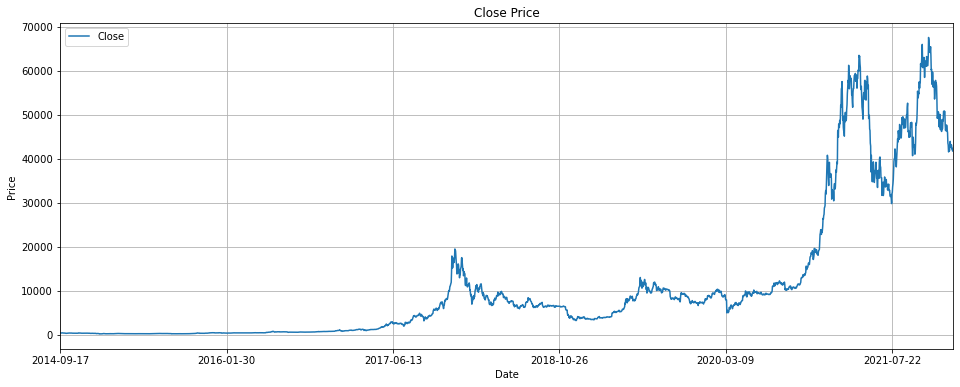

In [14]:
df.plot(x = 'Date', y = ['Close'], figsize = (16,6), grid =True, legend = True, xlabel = 'Date', ylabel = 'Price', title = 'Close Price').autoscale(axis = 'x', tight = True)

Видим что первый серьезный рост биткоина произошел  в конце 2017 - начале 2018 года и после двухлетней адаптации резко взлетел в 2021 году с 10 тыс. дол. до 50 тыс. дол.. С огромной волатильностью на данный момент.

Рассмотрим более детальные графики по первой половине 2021 года для наглядности волатильности цены.

<AxesSubplot:title={'center':'High and Low Price'}, xlabel='Date', ylabel='Price'>

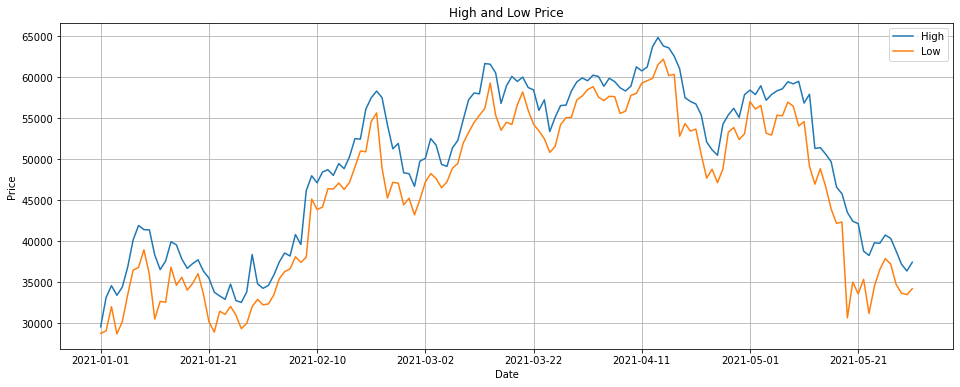

In [15]:
df17_plt = df.query("'2021-01-01' <= Date < '2021-06-01'")
df17_plt.plot(x = 'Date', y = ['High', 'Low'], figsize = (16,6), grid = True, legend = True, xlabel = 'Date', ylabel = 'Price', title = 'High and Low Price')

<AxesSubplot:title={'center':'Open and Close Price'}, xlabel='Date', ylabel='Price'>

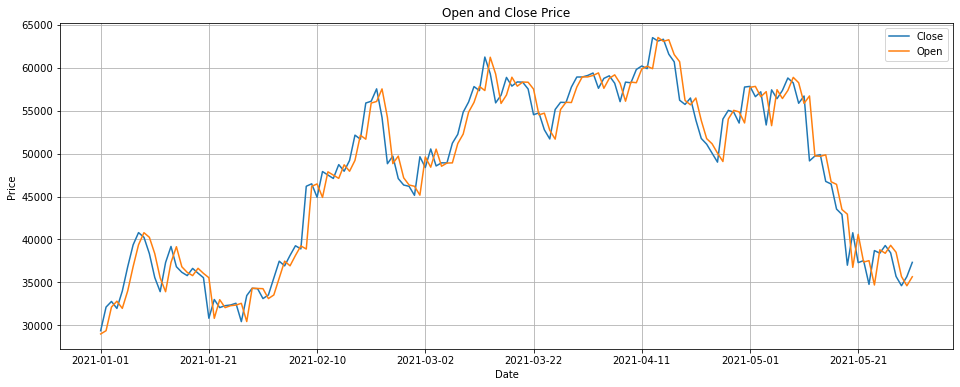

In [16]:
df17_plt.plot(x = 'Date', y = ['Close', 'Open'], figsize = (16,6), grid = True, legend = True, xlabel = 'Date', ylabel = 'Price', title = 'Open and Close Price')

Видим что волатильность в течение суток намного выше реальной цены закрытия, говорит об усредненной устойчивости валюты.

In [17]:
df[['Volume','Close']].corr()

,Volume,Close
Volume,1.000000,0.732466
Close,0.732466,1.000000


In [18]:
df17[['Volume','Close']].corr()

,Volume,Close
Volume,1.000000,0.662311
Close,0.662311,1.000000


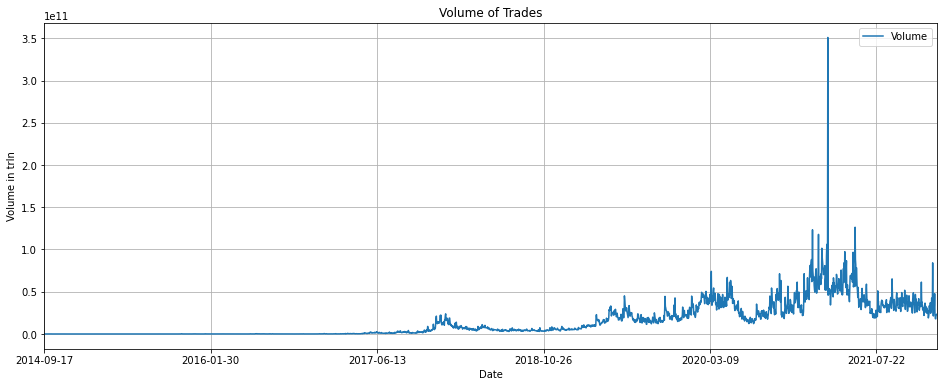

In [19]:
df.plot(x = 'Date', y = 'Volume',figsize = (16,6), grid = True, legend = True,  xlabel = 'Date', ylabel = 'Volume in trln', title = 'Volume of Trades').autoscale(axis = 'x', tight = True)

Импортируем библиотеки для анализа временных рядов и прогноза

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

Выбираем нужные столбцы для предсказаний, обязательно указывая частоту (fraquency), иначе не распознает

In [ ]:
time_row =df17[['Date','Close']]
time_row = time_row.set_index('Date')
time_row.index.freq = 'd' 

Проверяем на сезоность, как видим из третьего графика Seasonal, сезонность не обнаружена.

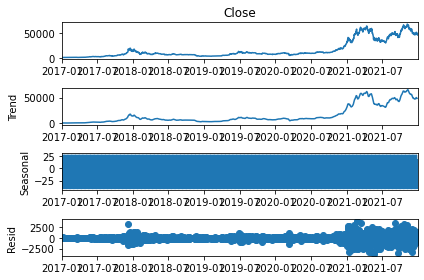

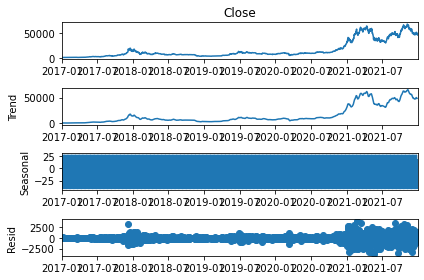

In [164]:
s = seasonal_decompose(time_row['Close'])
s.plot()

смотрим рекомендуемые параметры для настройки модели

In [62]:
auto_arima(time_row['Close']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -15028.985
Date:                Mon, 28 Mar 2022   AIC                          30071.970
Time:                        11:19:49   BIC                          30110.535
Sample:                             0   HQIC                         30086.196
                               - 1826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.4850     23.508      1.084      0.278     -20.590      71.560
ar.L1          0.8182      0.027     30.181      0.000       0.765       0.871
ar.L2         -0.8921      0.025    -35.211      0.000      -0.942      -0.842
ma.L1         -0.8580      0.032    -26.880      0.000      -0.921      -0.795
ma.L2          0.9035      0.033     27.314      0.000       0.839       0.968
ma.L3          0.0092      0.016      0.569      0.569      -0.022       0.041
sigma2      8.455e+05   1.09e+04     77.893      0.000    8.24e+05    8.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12828.92
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              12.35   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Обучаем модель

In [184]:
model = SARIMAX(time_row['Close'], order = (2,1,3))
result = model.fit()
# result.summary()

D:\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [226]:

pred = result.predict(). rename('ARIMA')


<AxesSubplot:xlabel='Date'>

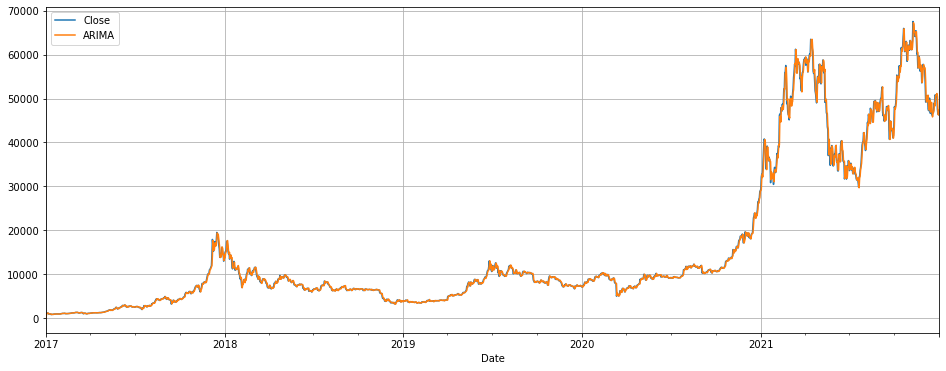

In [227]:
time_row.plot(legend = True)
pred.plot(figsize = (16,6), grid = True, legend = True)

Смотрим результат и видим, что модель сильно совпадает, посмотрим в цифрах:

In [231]:
for i in range(len(time_row)):
    print(f"predicted={pred[i]:11.9}, expected = {time_row['Close'][i]}")

predicted=        0.0, expected = 998.325012
predicted= 978.334605, expected = 1021.75
predicted=  1011.6761, expected = 1043.839966
predicted= 1042.41823, expected = 1154.72998
predicted= 1157.96512, expected = 1013.380005
predicted= 1025.29874, expected = 902.200989
predicted=  908.71927, expected = 908.585022
predicted= 903.639083, expected = 911.198975
predicted= 903.496433, expected = 902.828003
predicted= 901.383229, expected = 907.679016
predicted= 913.527593, expected = 777.757019
predicted= 790.336247, expected = 804.833984
predicted=  805.99076, expected = 823.984009
predicted= 815.649749, expected = 818.411987
predicted= 810.145104, expected = 821.797974
predicted= 822.079655, expected = 831.533997
predicted= 839.639241, expected = 907.937988
predicted= 911.300184, expected = 886.617981
predicted= 883.893869, expected = 899.072998
predicted= 890.459192, expected = 895.026001
predicted= 891.222102, expected = 921.789001
predicted= 925.355212, expected = 924.672974
predicted= 

Сделаем оценку модели

In [220]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
err= mean_squared_error(time_row['Close'], pred)
err1= rmse(time_row['Close'], pred)
print(f'error:{err1:11.9}')

error: 911.320041


Отклонение довольно большое, потому что с 2021 года данные сильно калеблются хаотично вверх вниз, что создает трудности для прогноза поведения временного ряда

Посмотрим прогноз на один год

<AxesSubplot:>

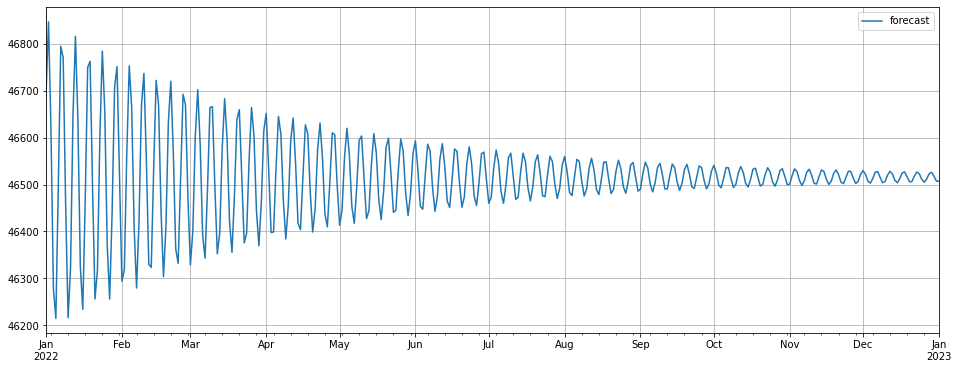

In [234]:
fcast = result.predict(len(time_row), len(time_row)+365).rename('forecast')
fcast.plot(figsize = (16,6), grid = True, legend = True)


Видим, что точный прогноз на хаотичных данных сделать невозможно. Тем не менее, прогноз показывает среднее значение вокруг которого вероятнее всего будет колебатся цена.

Наглядный график прогноза на год вперед

<AxesSubplot:xlabel='Date'>

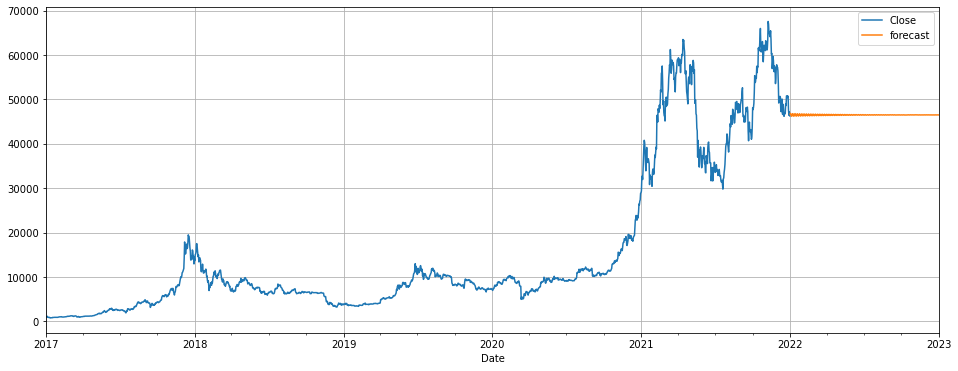

In [236]:
fcast = result.predict(len(time_row), len(time_row)+365).rename('forecast')
ax =time_row.plot(legend = True)
fcast.plot(figsize = (16,6), grid = True, legend = True)